### Experimenting with keras tensorboard callbacks and other utilities to monitor whats going on inside the model

> Will test with amazon imdb review dataset

In [1]:
import keras
from keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential

In [2]:
max_features = 2000
max_input_emb_len = 500

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=max_input_emb_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_input_emb_len)

model = Sequential()
model.add(Embedding(max_features, 128, input_length=max_input_emb_len, name='embed'))
model.add(Conv1D(32, 7, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(32, 7, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1))
model.summary()
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embed (Embedding)            (None, 500, 128)          256000    
_________________________________________________________________
conv1d (Conv1D)              (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 98, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 291,937
Trainable params: 291,937
Non-trainable params: 0
__________________________________________________

In [4]:
#!mkdir tb_log_dir

In [5]:
# histogram_freq =1  > Record activation histograms at every 1 epochs
# embeddings_freq =1 > Records embeddings data every 1 epochs

call_back = [keras.callbacks.TensorBoard(log_dir='tb_log_dir',
                                        histogram_freq=1,
                                        embeddings_freq=1)]

history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.2, callbacks=call_back)
# Activate the tensorboard in a termonal > tensorboard --logdir=tb_log_dir

Epoch 1/20
157/157 [==============================] - 46s 289ms/step - loss: 7.7364 - acc: 0.4985 - val_loss: 7.6168 - val_acc: 0.5062
Epoch 2/20
157/157 [==============================] - 50s 320ms/step - loss: 7.7364 - acc: 0.4985 - val_loss: 7.6168 - val_acc: 0.5062
Epoch 3/20
157/157 [==============================] - 52s 334ms/step - loss: 7.7364 - acc: 0.4985 - val_loss: 7.6168 - val_acc: 0.5062
Epoch 4/20
157/157 [==============================] - 52s 333ms/step - loss: 7.7364 - acc: 0.4985 - val_loss: 7.6168 - val_acc: 0.5062
Epoch 5/20
157/157 [==============================] - 53s 335ms/step - loss: 7.7364 - acc: 0.4985 - val_loss: 7.6168 - val_acc: 0.5062
Epoch 6/20
157/157 [==============================] - 55s 350ms/step - loss: 7.7364 - acc: 0.4985 - val_loss: 7.6168 - val_acc: 0.5062
Epoch 7/20
157/157 [==============================] - 53s 337ms/step - loss: 7.7364 - acc: 0.4985 - val_loss: 7.6168 - val_acc: 0.5062
Epoch 8/20
157/157 [==============================] - 5

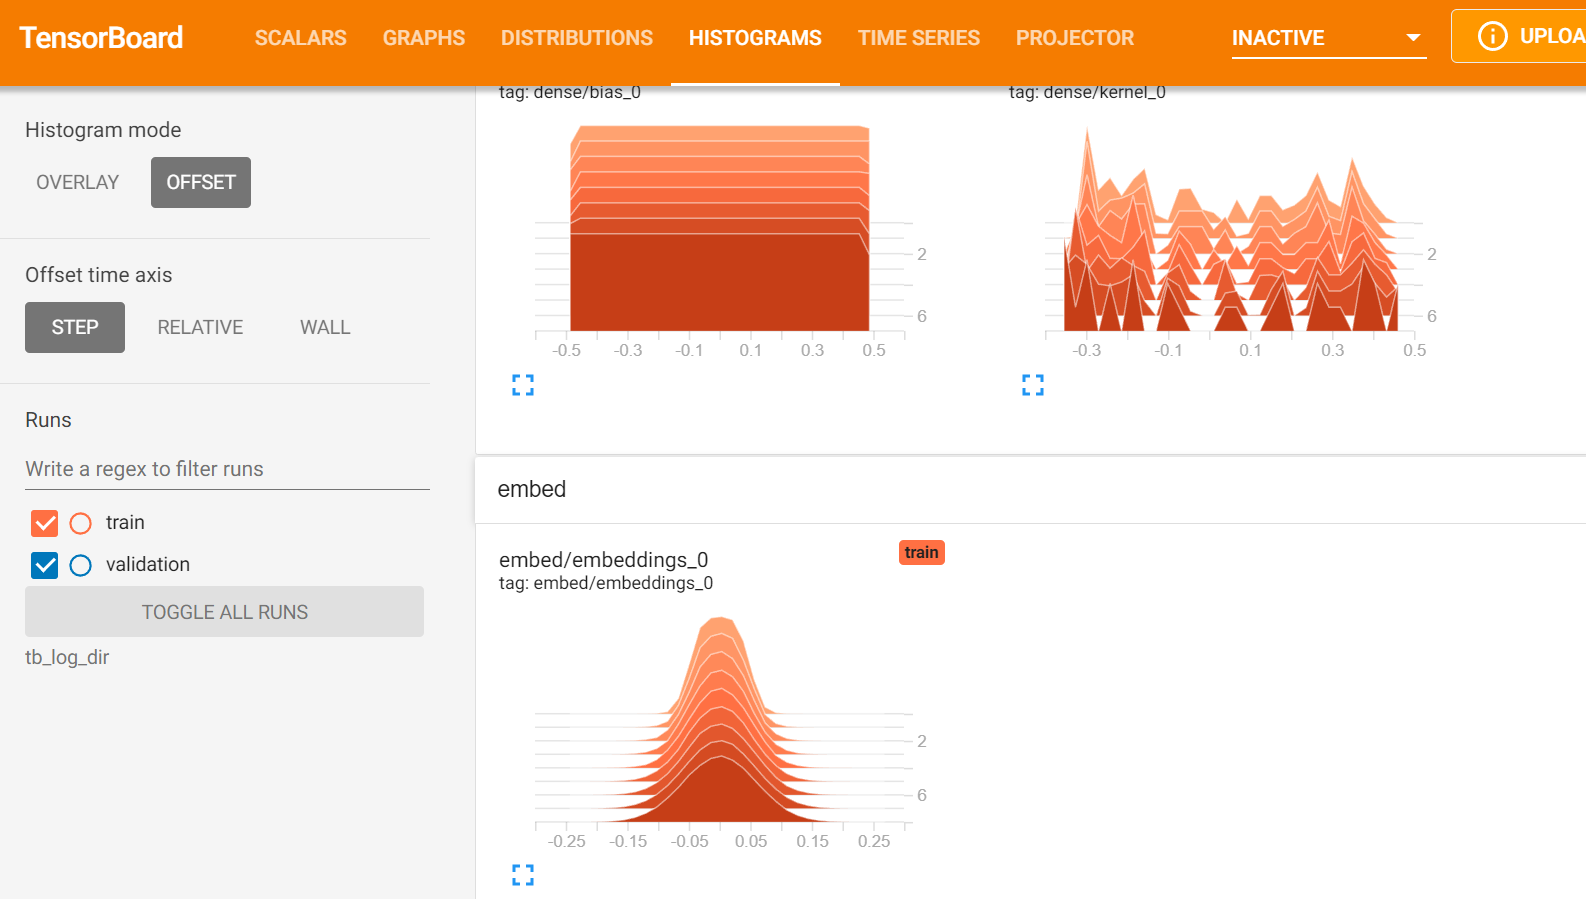

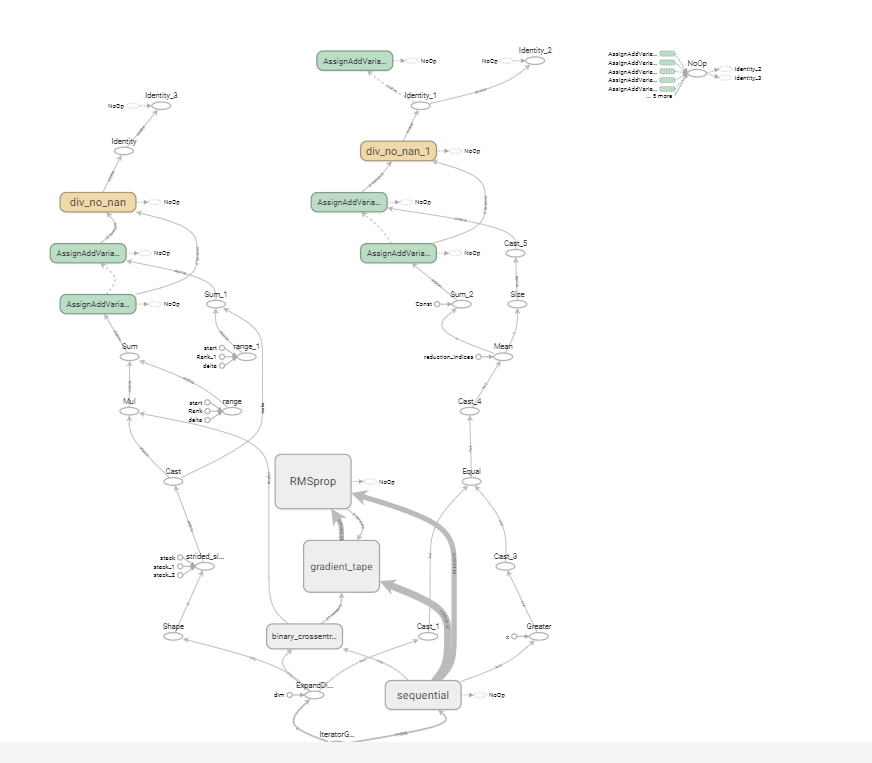

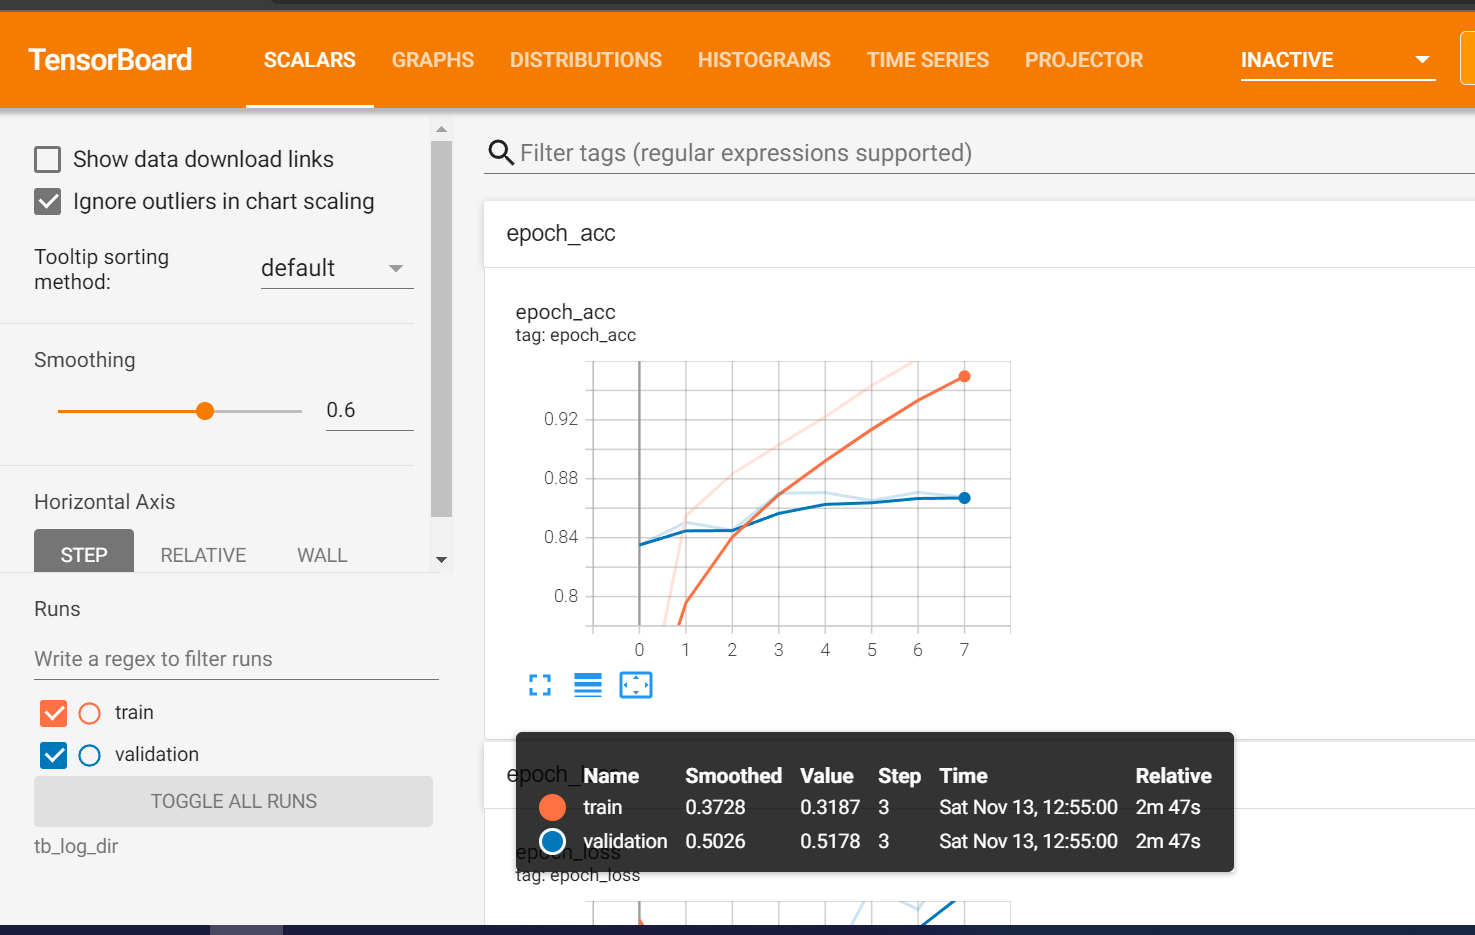

In [6]:
# Displaying tensorboard images 
from IPython.display import Image, display

listOfImageNames = ['./images/activation_histograms.png',
                    './images/network_diagram_tensorboard.png',
                   './images/plots.png']

for imageName in listOfImageNames:
    display(Image(filename=imageName))

Note: We can see the netwrok diagram is very completecated one compared to the simple linear stack at keras. That is the label of 
simplicity Keras brings to create the network otherwise we have to define all those elements if we use pure tensorflow from scratch.

#### We can also use keras utility to display cleaned version of network

> Make sure pydot, pydot-ng & graphviz is installed in your environment

    !pip install pydot

    !pip install pydot-ng

    !pip install graphviz

In [7]:
#from keras.utils import plot_model
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='./images/model.png')

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [8]:
#To visilaise the topology with shape information
plot_model(model, show_shapes=True, to_file='./images/model_with_shapeinfo.png')

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [ ]:
#for showing image: https://stackoverflow.com/questions/11854847/how-can-i-display-an-image-from-a-file-in-jupyter-notebook
#To run grpahviz: https://github.com/XifengGuo/CapsNet-Keras/issues/25